## Kuzmin disk
The Kuzmin disk density profile is

$$
\rho \left( R \right) = \Sigma(r, \theta)\delta(z)
$$

With

$$
\Sigma(r, \theta) = \dfrac{M_\mathrm{tot}}{2\pi}\dfrac{a}{(r^2+a^2)^{3/2}}
$$

$\newline$

To initialize the Plummer sphere we need to set the correct distributions for our particles cartesian coordinates. To do so we first need to find the cylindrical coordinates and then project them onto the cartesian plane. 

The mass can be found by simple integration over the volume, which yields

$$
    M(r, \theta, z) = \dfrac{M_\text{tot}}{2\pi} \int_0^{\theta}d\theta \int_{-\infty}^{z} \delta(z)\ dz \int_0^{r}\dfrac{a}{(r^2+a^2)^{3/2}}r\ dr
$$
<br>

$$
    M(r, \theta, z) = \dfrac{M_\text{tot}}{2\pi} \theta\  \Theta_\mathrm{HS}(z)\ \left(1- \dfrac{a}{\sqrt{a^2+r^2}}\right)
$$

$\newline$
The heaviside theta function is 0 everywhere except in z=0, therefore

<br>

$$
    M(r, \theta, z) = 
    \begin{cases}
    0 && z\neq 0 \\
    M_\text{tot} \dfrac{\theta}{2\pi} \ \left(1- \dfrac{a}{\sqrt{a^2+r^2}}\right) && z = 0
    \end{cases}
$$
<br>

Inverting the relation for $\xi = M(r)/M_{tot}$ we obtain the cdfs, while we already had the pdfs (integrands in the mass calculation)

<br>

$$
\begin{cases}
    p(r) = \dfrac{ra}{(r^2+a^2)^{3/2}} \\
    p(\theta) = {1}/{2\pi} \\
    p(z) = \delta(z)
\end{cases}
$$

<br>

$$
\begin{cases}
    P(r) = 1 - \dfrac{a}{\sqrt{a^2+r^2}} \\
    P(\theta) = {\theta}/{2\pi} \\
    P(z) = \Theta_\mathrm{HS}(z)
\end{cases}
$$

And their inverse are

$$
\begin{cases}
    r(P) = a \sqrt{\dfrac{1}{(P-1)^2} - 1} \\
    \theta(P) = 2\pi P\\
    z(P) = 0
\end{cases}
$$

Now we can initialize the disk

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm.notebook import tqdm
from IPython.display import HTML

plt.style.use('../../sim.mplstyle')
%config InlineBackend.figure_format = 'retina'

In [2]:
import sys
sys.path.insert(1, '../')
from gdsam import initial_data

In [3]:
disk = initial_data()
N = int(1e4)
a = 10

In [4]:
u_r = lambda P : a*np.sqrt(1/(P-1)**2-1)
u_theta = lambda P : 2*np.pi*P
u_z = lambda P: 0*P

#### Note
While inverse sampling is the faster method, using rejection sampling is actually better in this instance. In fact this way we avoid getting outliers 

In [5]:
disk.custom_distribution_cyl(N, 1, u_r, u_theta, u_z)

In [6]:
np.max(disk.r)

1588047.4980629117

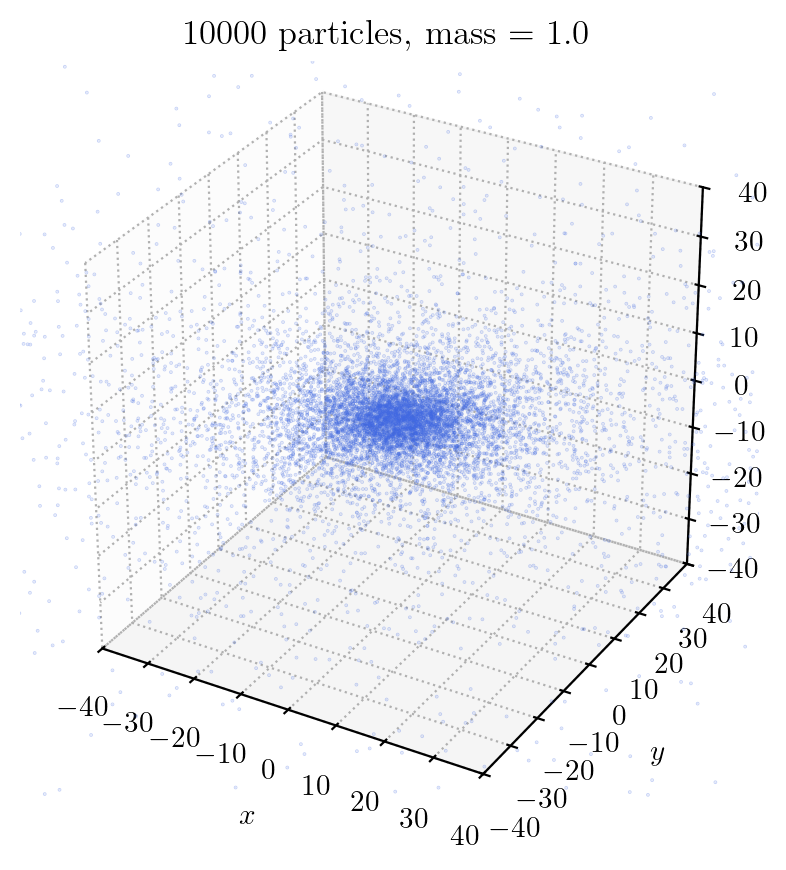

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
disk.positions_3d(ax, l=40, s=.1, a=.3)


plt.show()

(<Figure size 640x480 with 3 Axes>,
 array([<Axes: title={'center': '$r$ distribution'}, xlabel='$r$', ylabel='$p(r)$'>,
        <Axes: title={'center': '$\\theta$ distribution'}, xlabel='$\\theta$', ylabel='$p(\\theta)$'>,
        <Axes: title={'center': '$z$ distribution'}, xlabel='$z$', ylabel='$p(z)$'>],
       dtype=object))

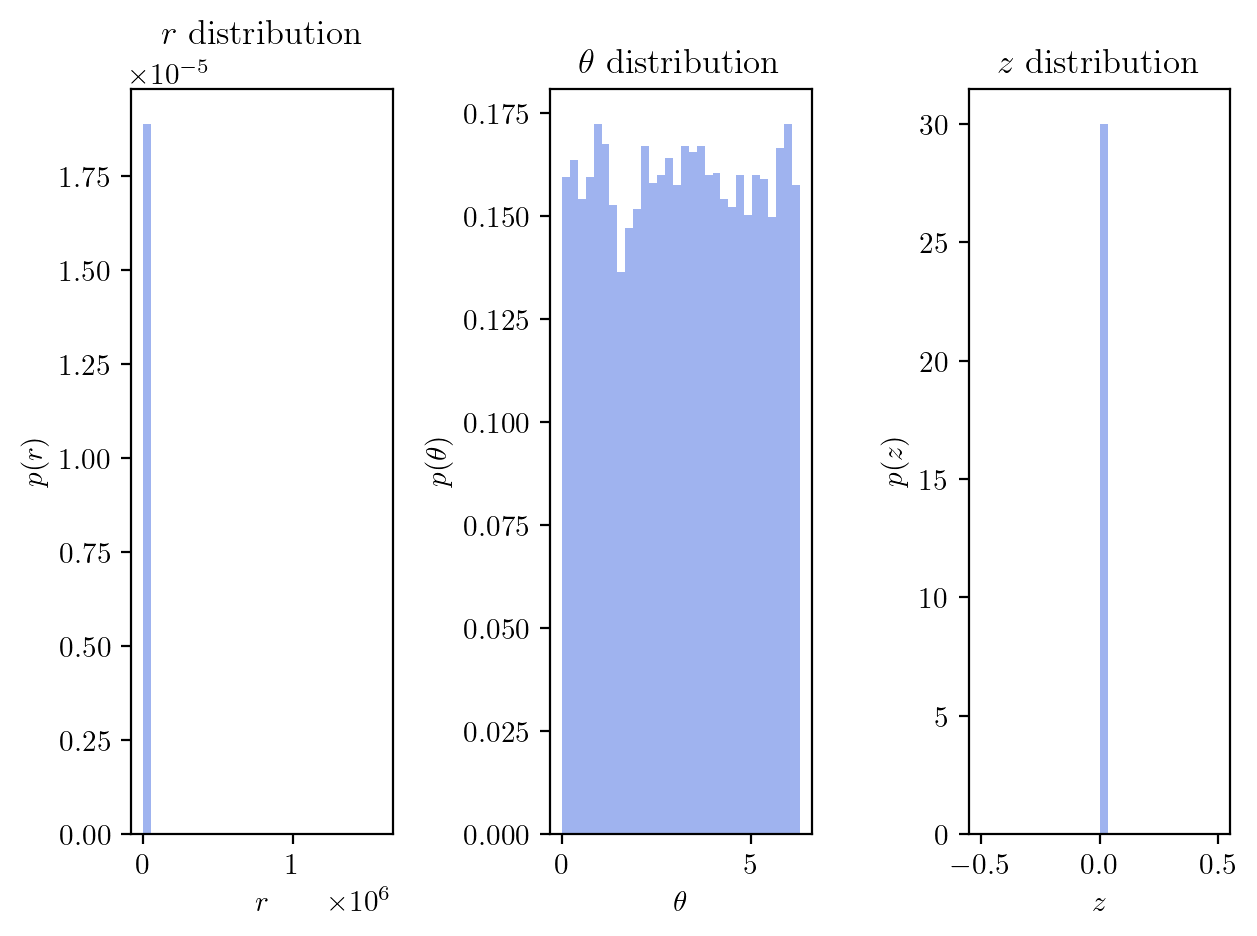

In [8]:
disk.show_dist_cyl(b=30)

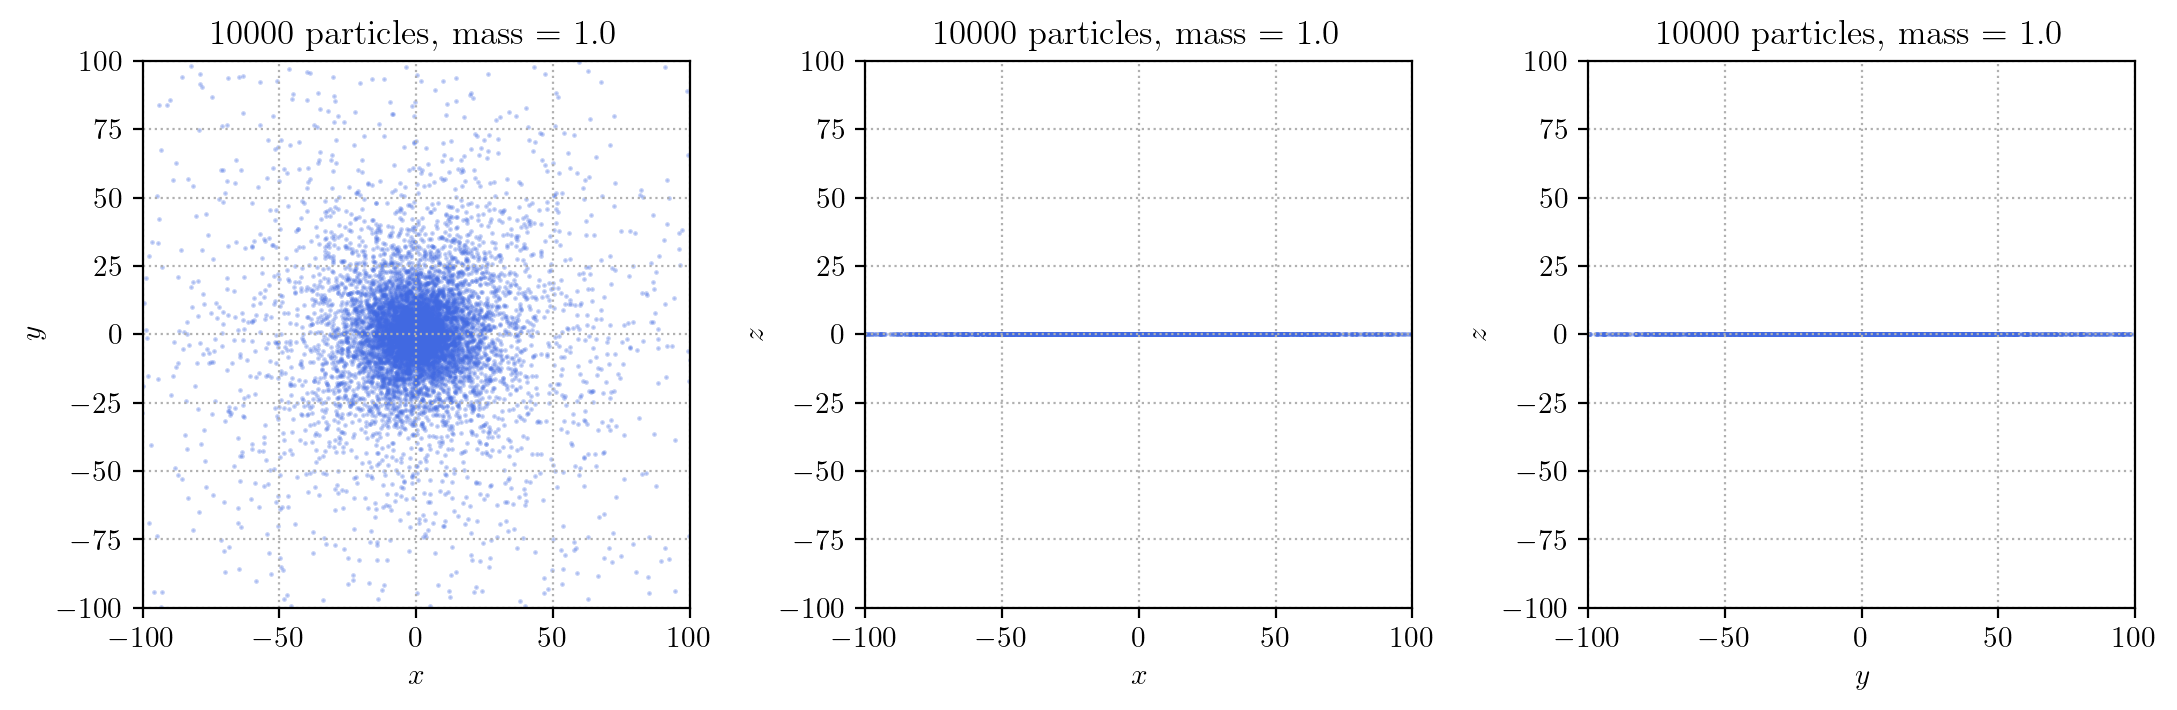

In [9]:
_, axs = disk.projections(l=100, s=.5, a=.3)

plt.show()

In [10]:
# we are still in internal units
G = 1
M = np.sum(disk.m)
R = disk.r

Psi = G * M /(R**2 + a**2)**(1/2)

---

In [11]:
home = '../../'
input = home + f'data/inputs/kuzmin{N}.txt' 
output = home + f'data/outputs/kuzmin{N}.txt'
log = f'../../data/outputs/kuzmin{N}_log.txt'

In [12]:
disk.initialize_velocities()

In [13]:
open(input, 'w').close()  #clearing input file
open(output, 'w').close() #clearing output file
open(log, 'w').close()    #clearing log file
disk.write_tree(input)

Now we calculate the softening and accuracy parameters, we need to use the volume of the disk

In [14]:
V = 1*np.pi*a**2 # i take a cylinder of height 1 and area=disk
epsilon = 1/100 * (V/int(float(N)))**(1/3)

In [15]:
T_sim = 400
dt = 1
theta = 0.1

In [16]:
print(f'T_sim = {T_sim:.1f} \t epsilon = {epsilon:.2e} \t dt = {dt:.2f}')

T_sim = 400.0 	 epsilon = 3.16e-03 	 dt = 1.00


In [20]:
os.system(home + f'treecode/tree/treecode in={input} out={output} eps={epsilon} tstop={T_sim} dtout={dt}>{log}')

0

In [21]:
import gdsam

pl = gdsam.plotter()
pl.get_data_tree(output)

Loaded 1e+04 particles


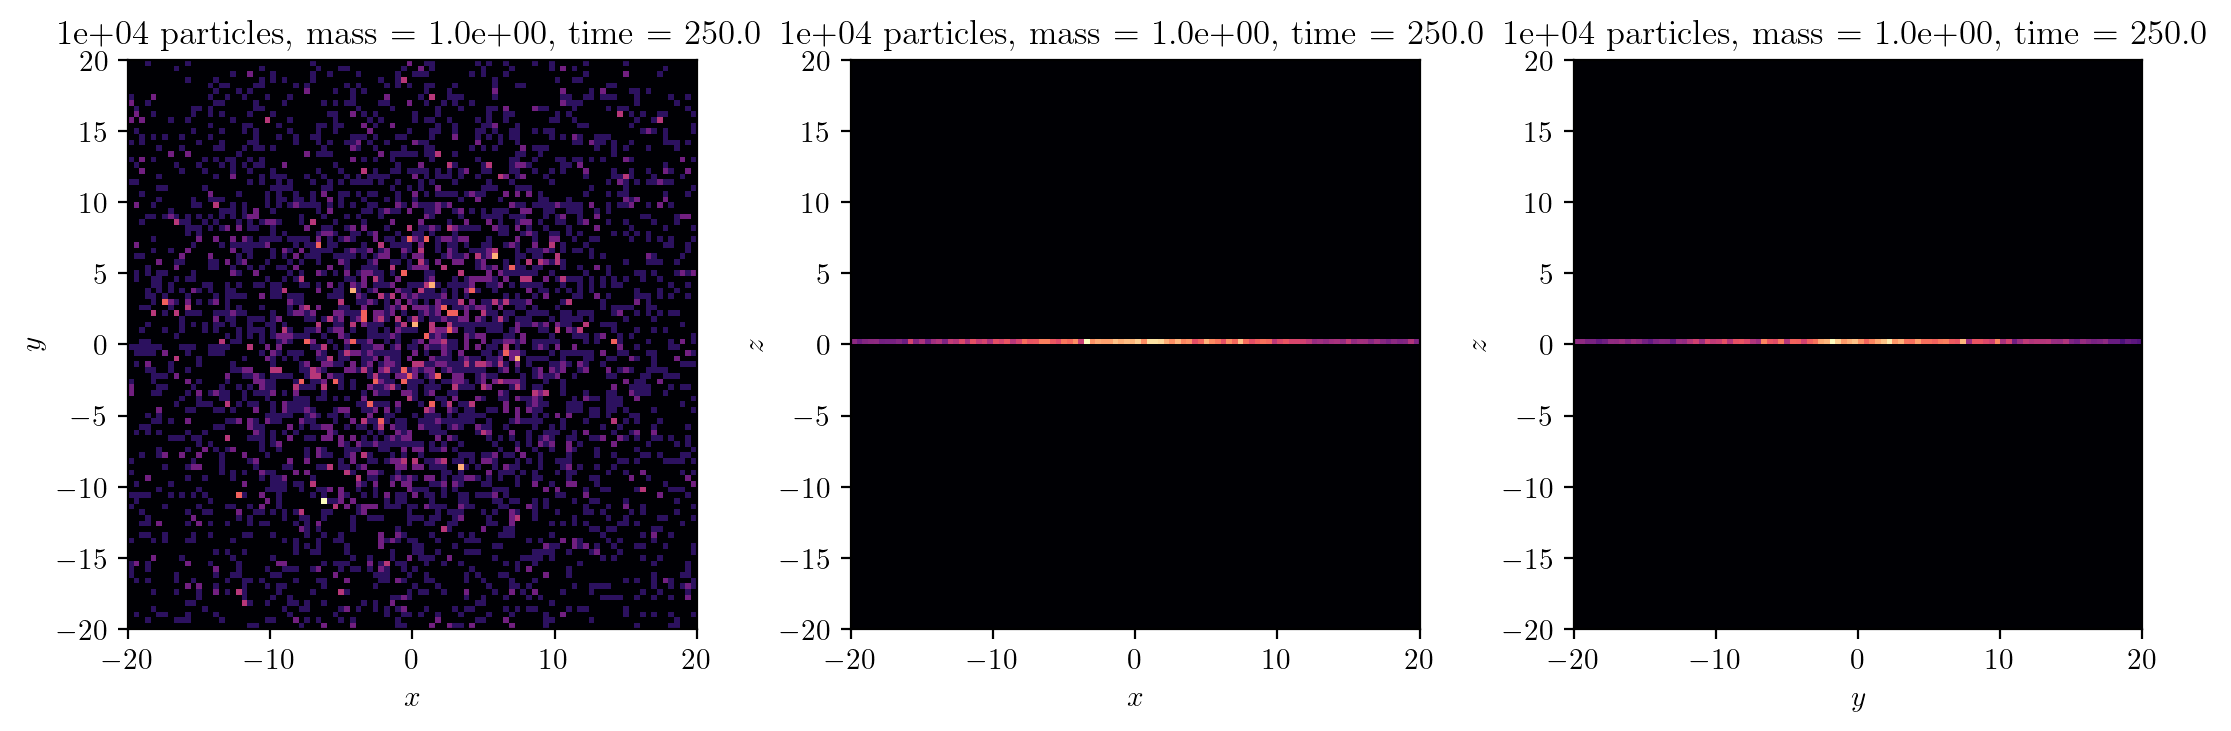

In [22]:
i = 250
pl.projections_heatmap(num=i, x_min =-20, y_min =-20, z_min =-20, l=40);

In [ ]:
pl.preview_animation(l=40)